In [1]:
import pandas as pd
import numpy as np

In [4]:
col_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [9]:
df = pd.read_csv('Iris.csv', sep=",", names=col_names, na_values='?')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [8]:
df.shape

(150, 5)

### Data cleaning(Remove NA, ?, Negative values etc.)

In [11]:
df = df.replace('?', np.nan)  # Replace '?' values with NaN
df = df.dropna()

In [12]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Transformation

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
le = LabelEncoder()
le.fit(df['class'])
le.classes_

array([0, 1, 2])

In [20]:
df['class'] = le.transform(df['class'])

In [21]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
# Manual Way
# Convert the target variable to numerical values
# df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

### Error correcting (Outlier detection and removal)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

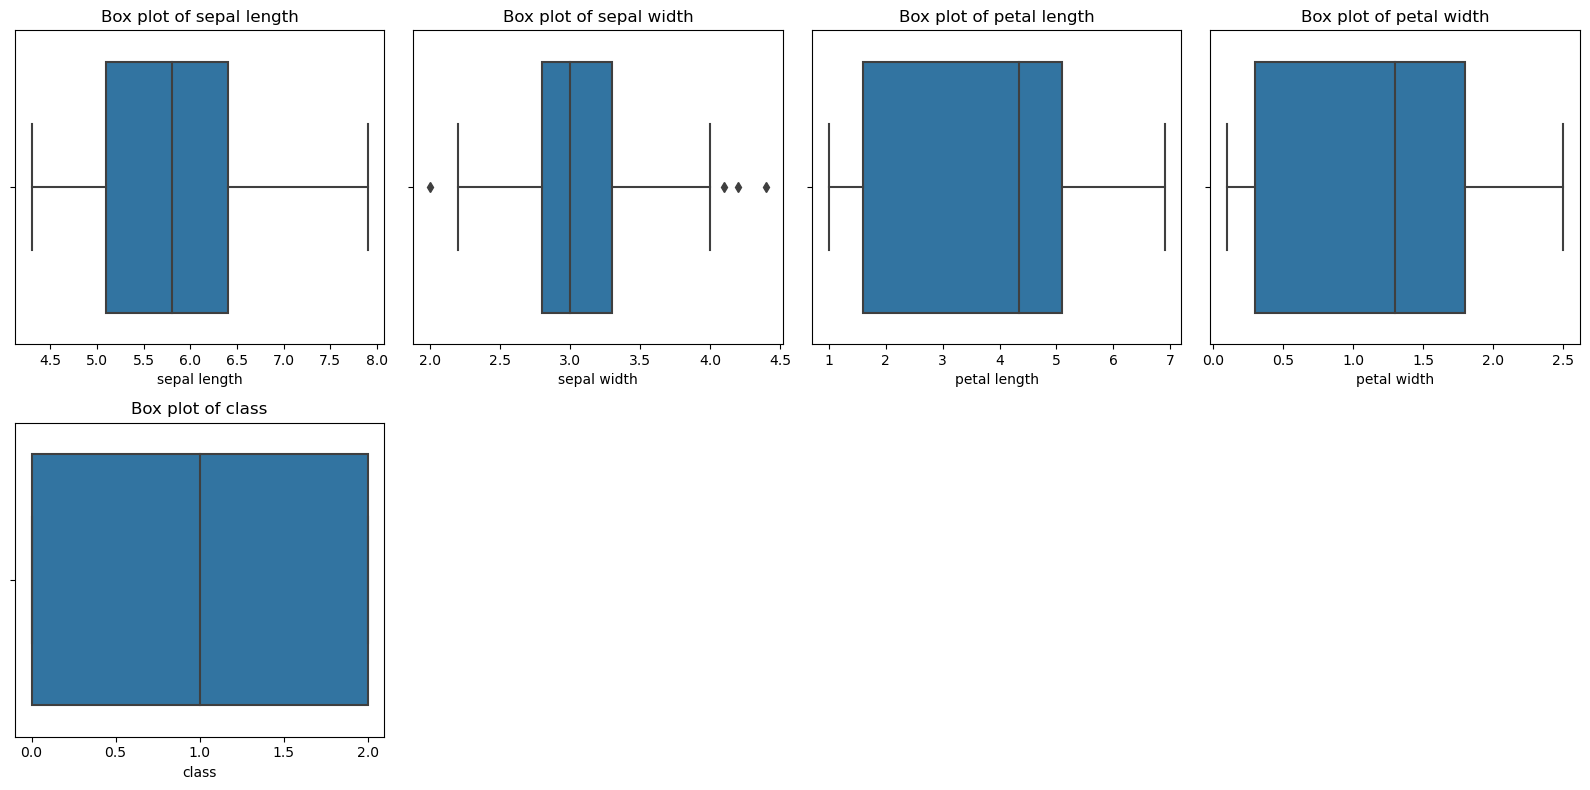

In [27]:
def vis_outlier(df):
    num_cols = len(df.columns)
    rows = (num_cols+3)//4
    cols = min(num_cols, 4)

    fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))

    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.boxplot(ax=axes[i], x=df[column])
        axes[i].set_title(f'Box plot of {column}')
        axes[i].set_xlabel(column)
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

vis_outlier(df)

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


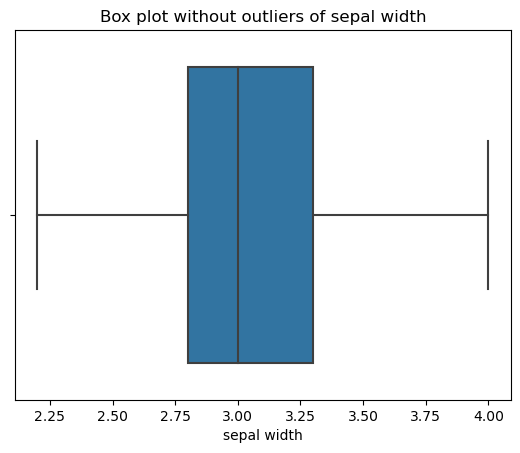

In [31]:
def remove_outlier(df, column, mn, mx):
    df = df[(df[column] <= mx) & (df[column] >= mn)]  # Filter based on min and max values

    sns.boxplot(df[column])
    plt.title(f'Box plot without outliers of {column}')
    plt.show()

remove_outlier(df, 'sepal width', 2.2, 4)


### Build Data model using regression and Naïve Bayes methods and compare accuracy of Iris Species Prediction.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [34]:
#splitting of train and test data
attributes = df[["sepal length", "sepal width", "petal length", "petal width"]]
target = df['class']
x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size=.3, random_state=34)

#### Logistic Regression Model

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logi_y_pred = lr.predict(x_test)

In [37]:
acc = accuracy_score(y_test, logi_y_pred)
acc

0.9777777777777777

#### Naive Bayes

In [39]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [41]:
nb_y_pred = nb.predict(x_test)

In [42]:
acc2 = accuracy_score(y_test, nb_y_pred)

In [43]:
acc2

0.9555555555555556